# Seção 14.12 - Regressão Polinomial (base plano de saúde)
Para esta seção, usarei a base de dados plano_saude.csv do curso do Prof. Jones Granatyr.

# Pontos importantes da regressão com redes neurais:
1. Teremos somente um neurônio na saída.
2. A função de ativação linear no neurônio de saída tem bons resultados.
3. A função de ativação RELU nos neurônios das camadas ocultas tem bons resultados.

In [2]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import (show,
                      output_notebook)
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosta!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [3]:
nomeDaBase = "../bases/plano_saude2.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [4]:
df.head(5).T

,0,1,2,3,4
idade,18,23,28,33,38
custo,470,520,630,830,1150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
idade    10 non-null int64
custo    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,10.0,40.5,15.138252,18.0,29.25,40.5,51.75,63.0
custo,10.0,2545.0,3021.005168,470.0,680.00,1340.0,2820.00,10100.0


### Breve análise da  base:
- não há nulos;
- só existem duas variáveis, a idade (variável independente) e o custo (variável dependente); e
- não há valores que apresentam incosistências (ex.: negativos quando não é possível).

## Aplicando o modelo

In [7]:
# Separando os fatores/previsores da resposta/target:
    
x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
 
# IMPORTANTE! Tive que fazer um reshape nos valores de x e y.

## Escalonando

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [10]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor()

regressor.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Visualisando:

In [14]:
reta_y.shape

(10,)

In [15]:
reta_x = np.linspace(min(x), max(x),10).reshape(-1,1)
reta_y = regressor.predict(reta_x).reshape(-1,1)
reta_df = np.concatenate((reta_x, reta_y), axis=1)
reta_df = pd.DataFrame(reta_df, columns=("idade", "custo"))

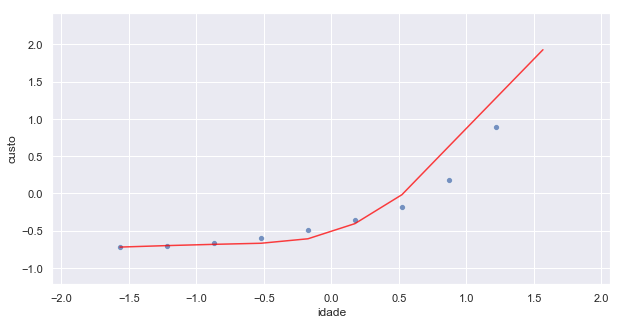

In [22]:
sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)
ax.set(xlim = (min(reta_x)-0.5, max(reta_x)+0.5),ylim=(min(reta_y)-0.5, max(reta_y)+0.5))

df_temp = np.concatenate((x, y), axis=1)
df_temp= pd.DataFrame(df_temp, columns=("idade", "custo"))

ax = sns.scatterplot(x="idade", y="custo", data=df_temp, alpha=0.75);
ax = sns.lineplot(x="idade", y="custo", data=reta_df, alpha=.75, color="red");

### Verificando o como o modelo se saiu

In [43]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(x)

r2_score(y, y_pred)

0.9101280670788567